In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv")

In [3]:
df.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            None of them             No  ...           1.60   
1         6.0            None of them             No  ...           1.78   
2         8.0  6 or more, but not all             No  ...           1.85   
3         9.0            None of them             No  ...           1.70   
4         5.0                  1 to 5             No  ...           1.55   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0             71.67  27.99              No         No          Yes   
1             95.25  30.13              No         No          Yes   
2            108.86  31.66             Yes         No           No   
3             90.72  31.32              No         No          Yes   
4             79.38  33.07              No         No          Yes   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0           Yes                                 Yes, received Tdap   
1           Yes  Yes, received tetanus shot but not sure what type   
2           Yes  No, did not receive any tetanus shot in the pa...   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No      Yes  
4               No       No  

[5 rows x 40 columns]

In [4]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe()

Summary Of The Dataset with numerical columns :


PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246022.000000     246022.000000  246022.000000   246022.000000   
mean             4.119026          4.167140       7.021331        1.705150   
std              8.405844          8.102687       1.440681        0.106654   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      246022.000000  246022.000000  
mean           83.615179      28.668136  
std            21.323156       6.513973  
min            28.120000      12.020000  
25%            68.040000      24.270000  
50%            81.650000      27.460000  
75%            95.250000      31.890000  
max           292.570000      97.650000

In [5]:
 df.duplicated().sum()

9

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  HadAngina                  246013 non-null  object 
 11  HadStroke                  246013 non-null  object 
 12  HadAsthma                  246013 non-null  object 
 13  HadSkinCancer              246013 

In [8]:
print("Check number of distinct values")
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Check number of distinct values
State: 54 distinct values
Sex: 2 distinct values
GeneralHealth: 5 distinct values
PhysicalHealthDays: 31 distinct values
MentalHealthDays: 31 distinct values
LastCheckupTime: 4 distinct values
PhysicalActivities: 2 distinct values
SleepHours: 23 distinct values
RemovedTeeth: 4 distinct values
HadHeartAttack: 2 distinct values
HadAngina: 2 distinct values
HadStroke: 2 distinct values
HadAsthma: 2 distinct values
HadSkinCancer: 2 distinct values
HadCOPD: 2 distinct values
HadDepressiveDisorder: 2 distinct values
HadKidneyDisease: 2 distinct values
HadArthritis: 2 distinct values
HadDiabetes: 4 distinct values
DeafOrHardOfHearing: 2 distinct values
BlindOrVisionDifficulty: 2 distinct values
DifficultyConcentrating: 2 distinct values
DifficultyWalking: 2 distinct values
DifficultyDressingBathing: 2 distinct values
DifficultyErrands: 2 distinct values
SmokerStatus: 4 distinct values
ECigaretteUsage: 4 distinct values
ChestScan: 2 distinct values
RaceEthnicity

In [9]:
df.columns 

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols 

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [12]:
mypal = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']

# Univariate Analysis:

 Univariate analysis for PhysicalHealthDays column:
 Univariate analysis for MentalHealthDays column:
 Univariate analysis for SleepHours column:
 Univariate analysis for HeightInMeters column:
 Univariate analysis for WeightInKilograms column:
 Univariate analysis for BMI column:


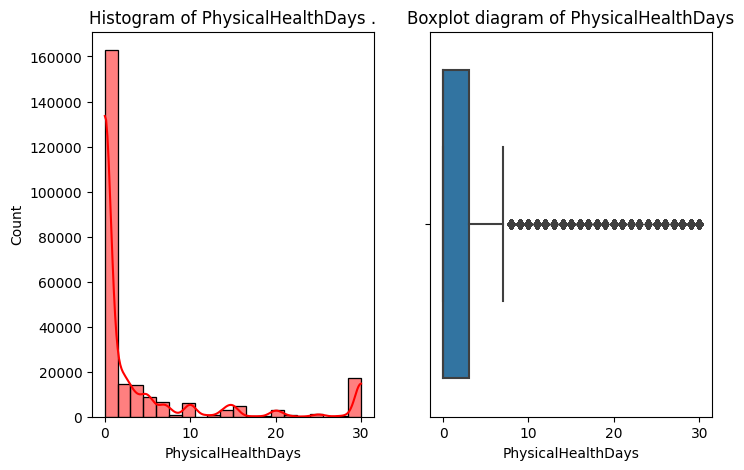

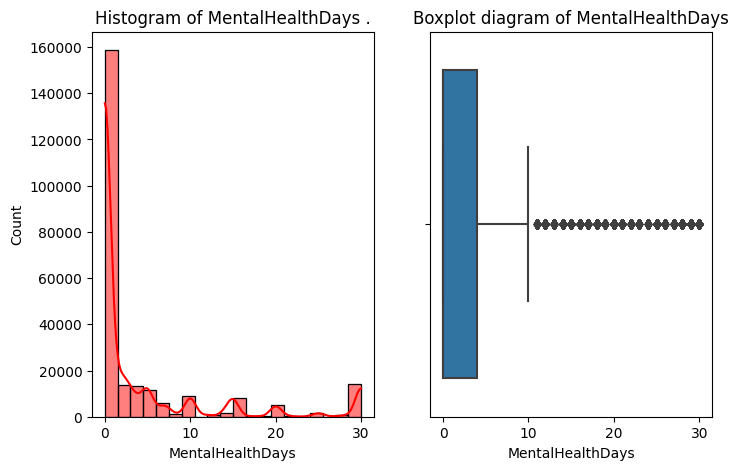

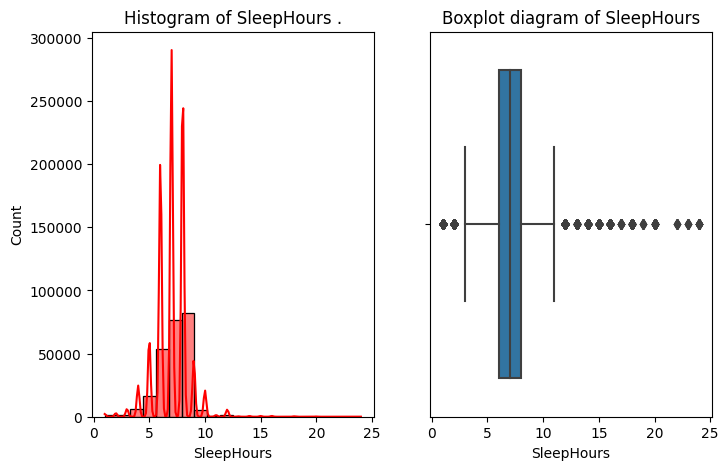

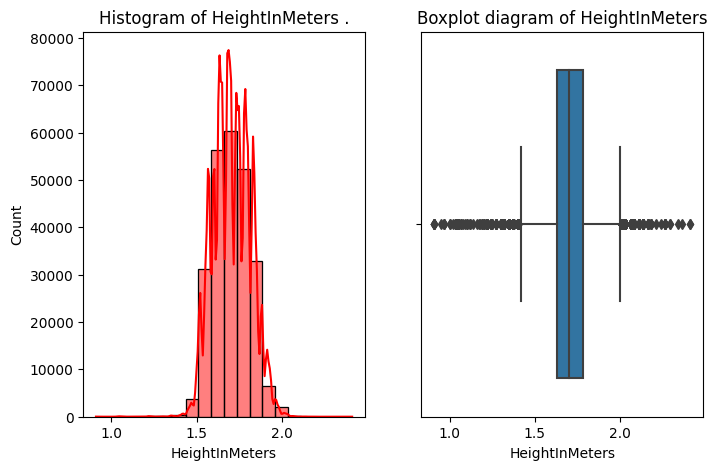

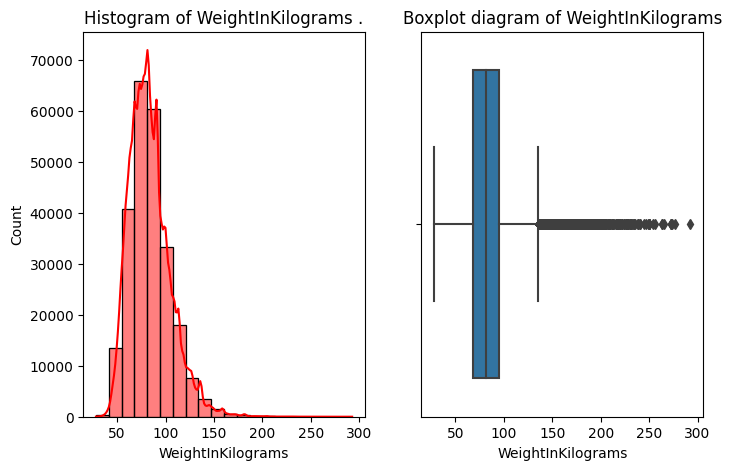

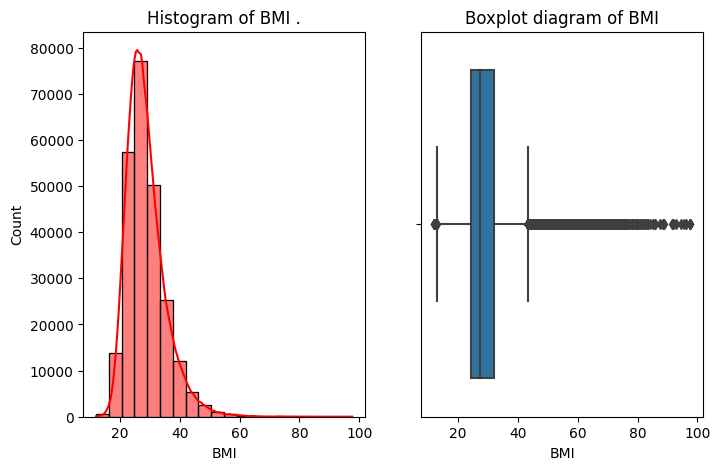

In [13]:
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(8,5))    
    sns.histplot(df[col], kde=True, bins=20, color='Red',ax=ax[0])
    ax[0].set_title(f'Histogram of {col} .')
    
    sns.boxplot(x=df[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}')
    
for col in numeric_cols:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

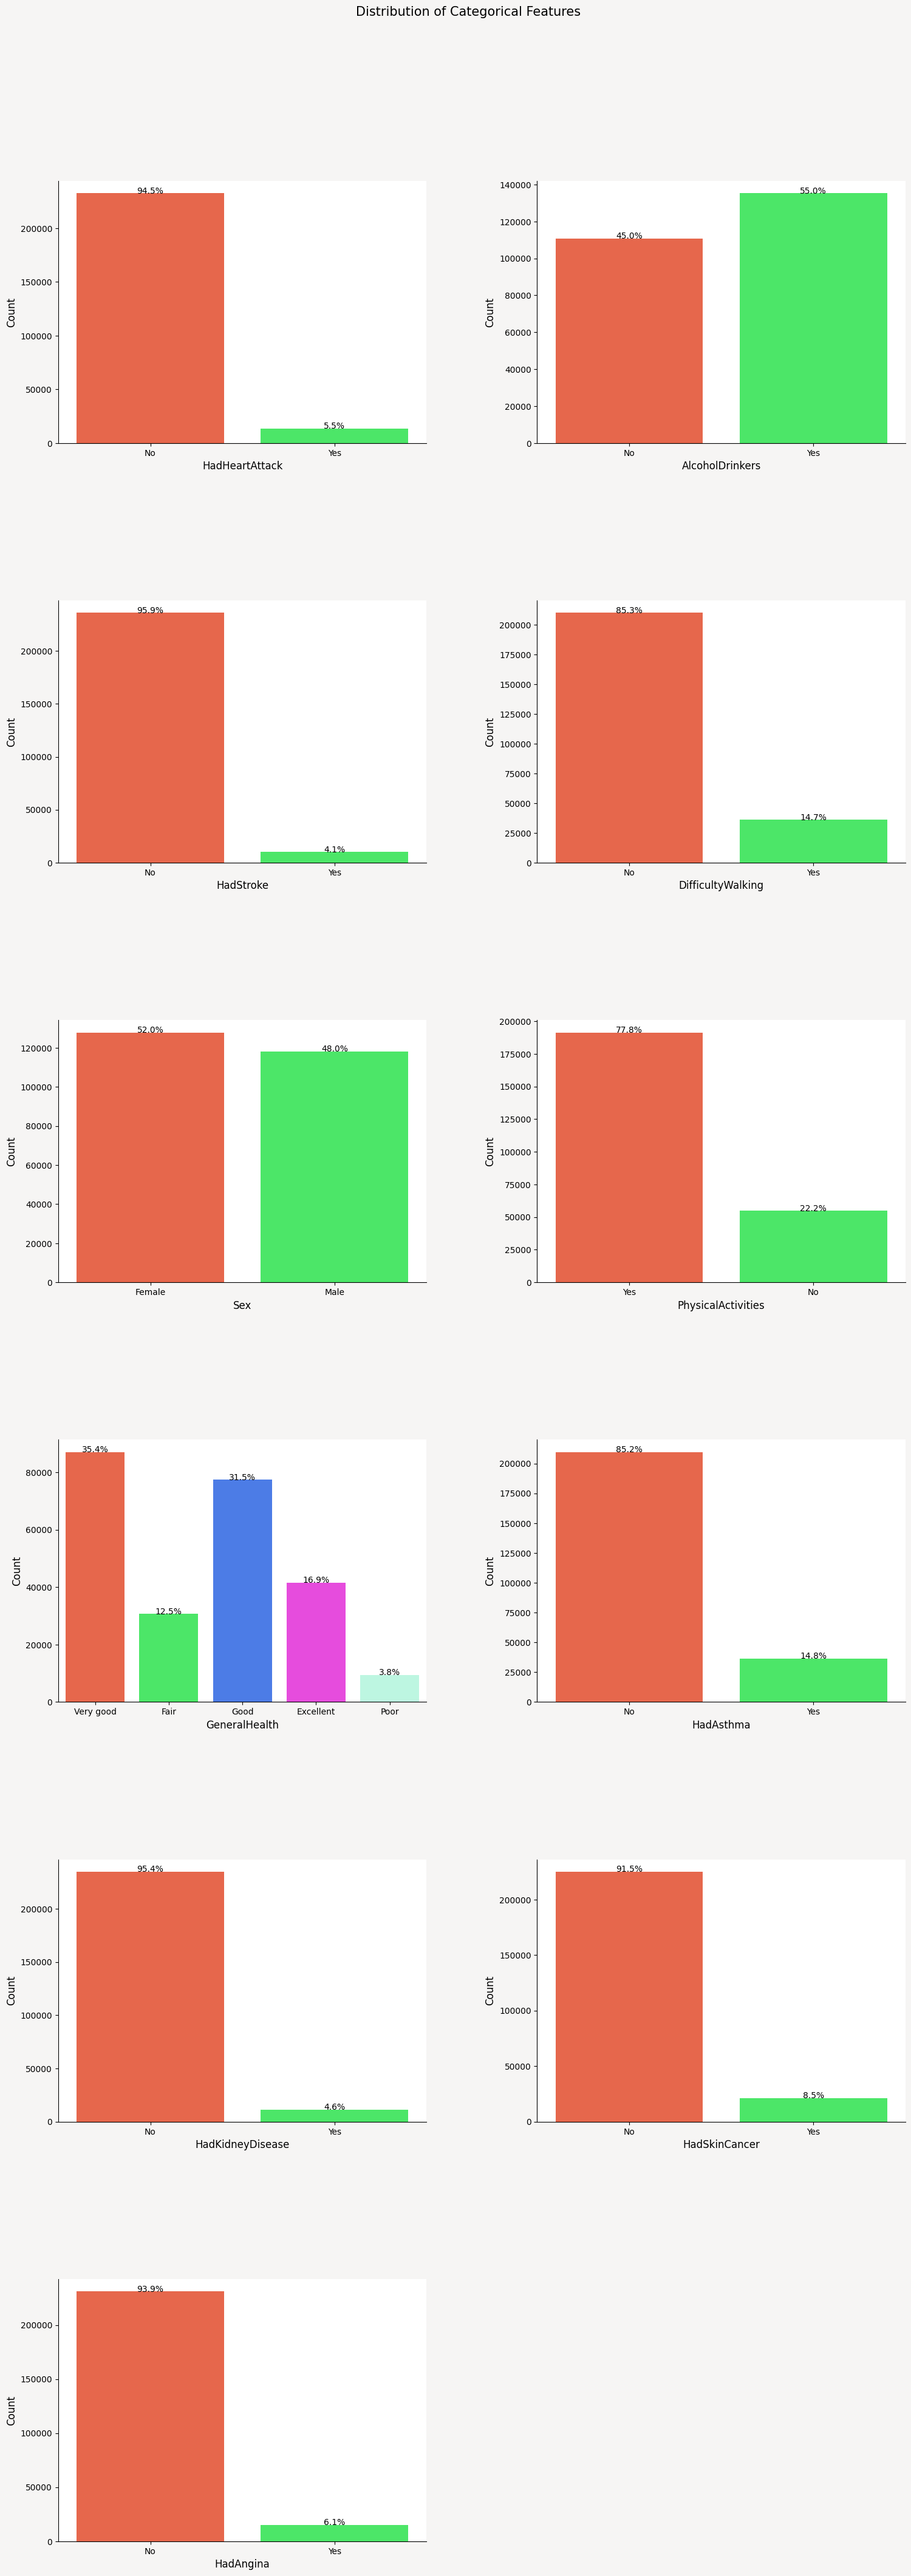

In [14]:
cat_feats = ['HadHeartAttack', 'AlcoholDrinkers', 'HadStroke', 'DifficultyWalking', 'Sex', 'PhysicalActivities',
             'GeneralHealth', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer', 'HadAngina']
L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.6, wspace=0.3)  

i = 0
for col in cat_feats:
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=df, x=col, palette=mypal, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1
    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features', fontsize=15)
plt.show()


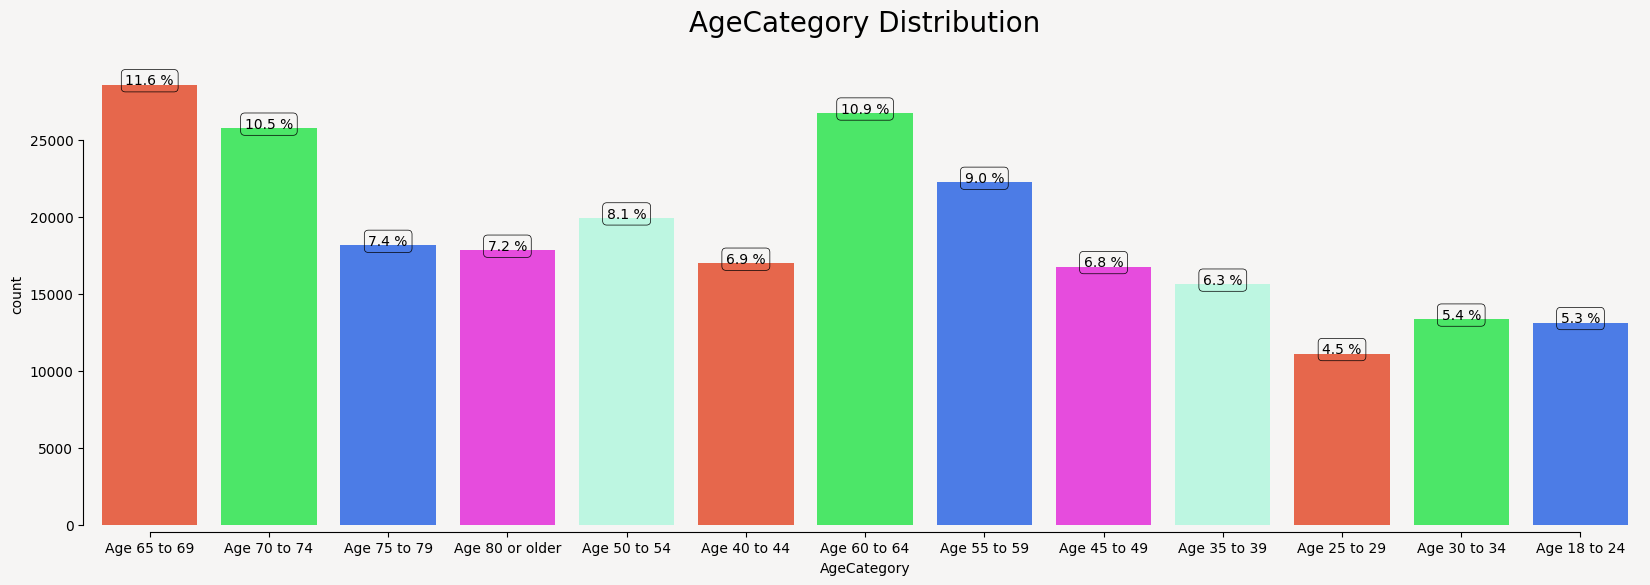

In [15]:
plt.figure(figsize=(20, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['AgeCategory'], palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

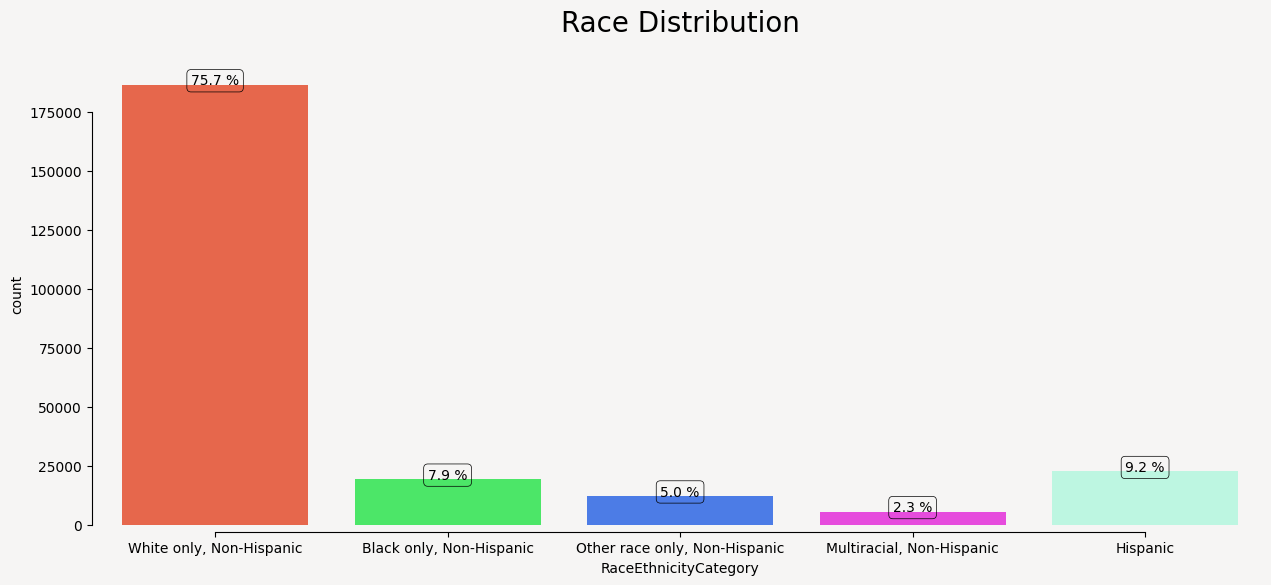

In [16]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['RaceEthnicityCategory'], palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

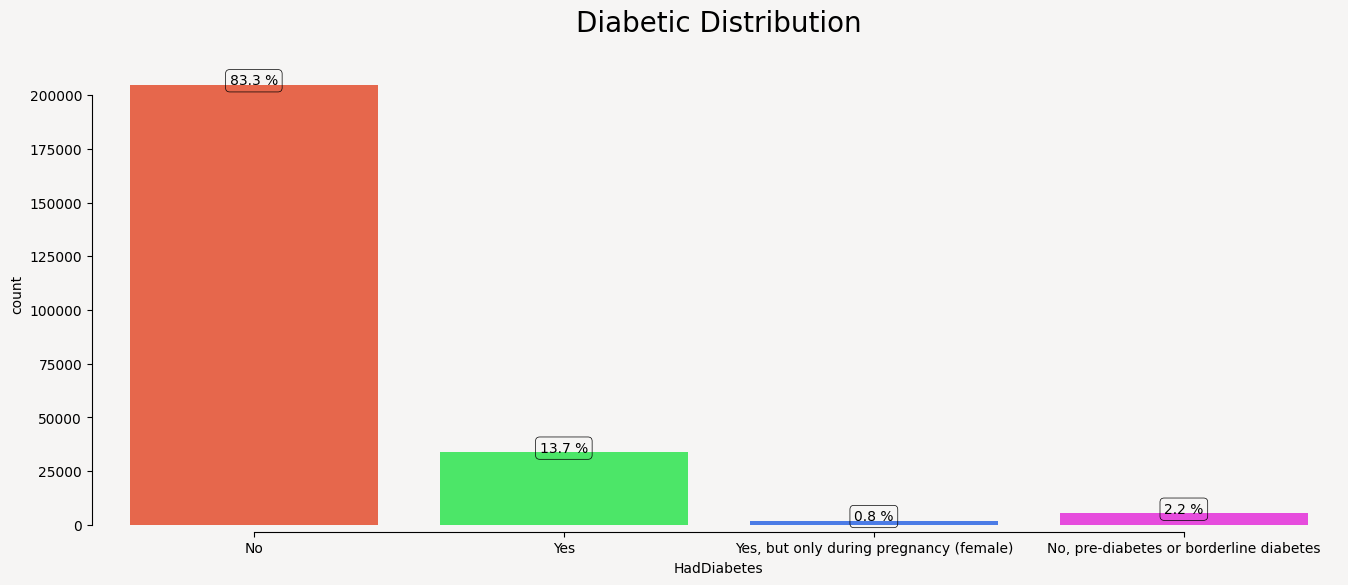

In [17]:
plt.figure(figsize=(16, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HadDiabetes'], palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Bivariate analysis:

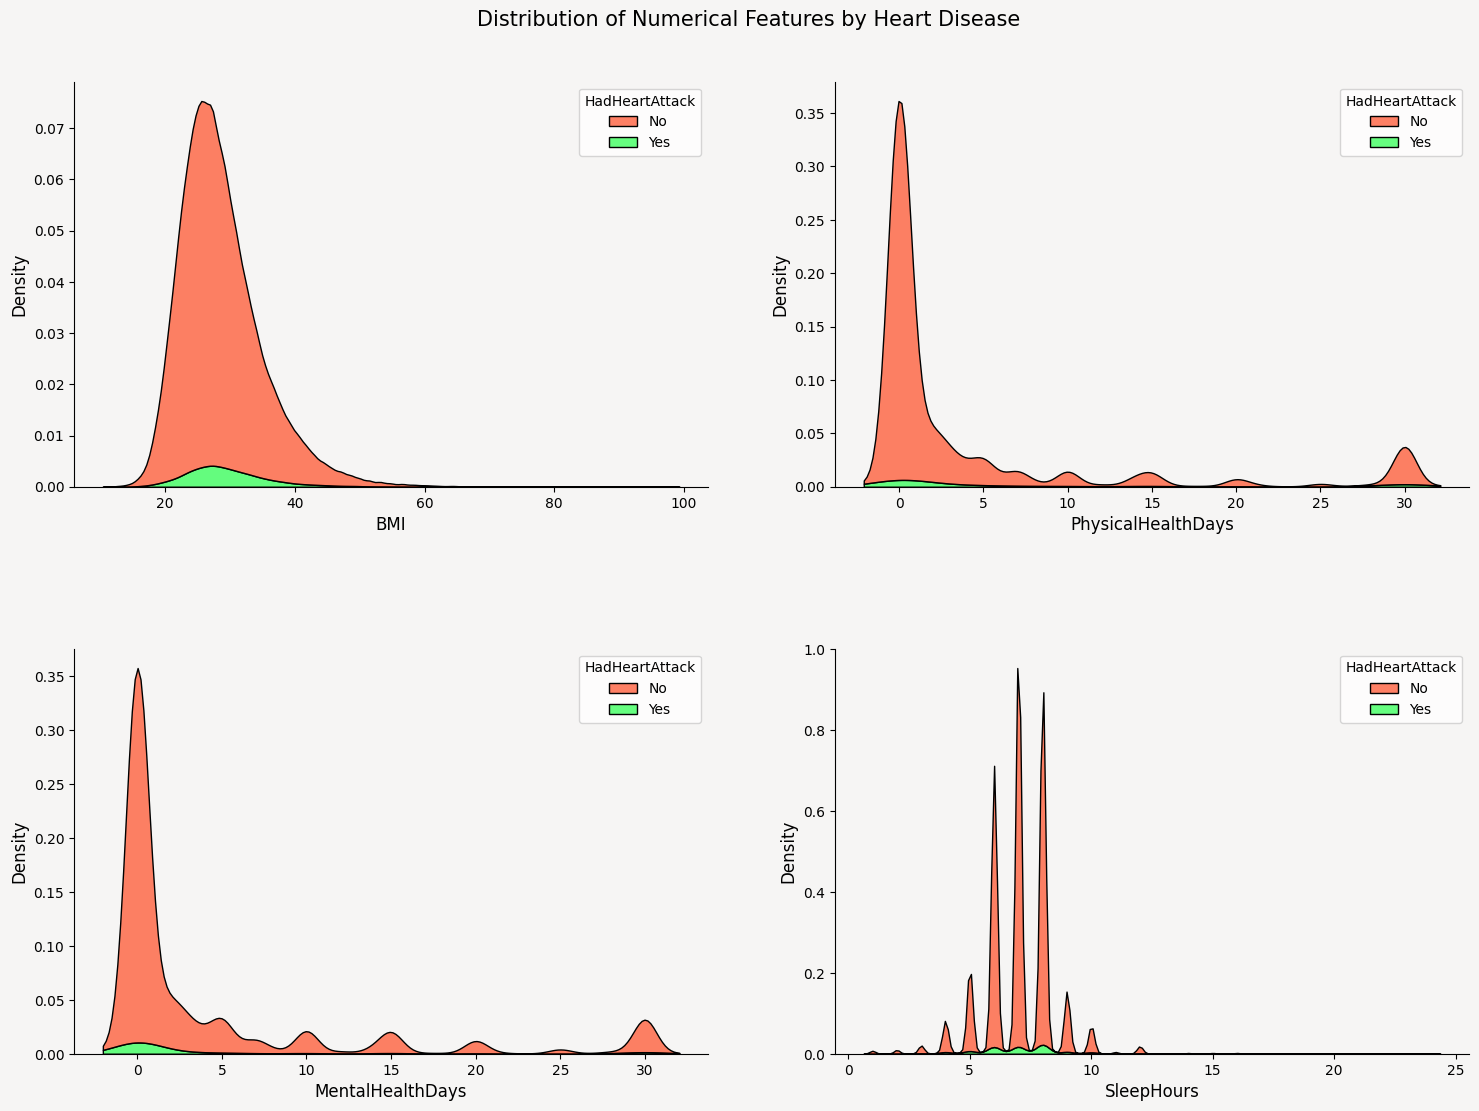

In [18]:
num_feats = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(18, 6 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2) 

i = 0
for col in num_feats:
    plt.subplot(nrow, ncol, i + 1, facecolor='#F6F5F4')

    sns.kdeplot(data=df, x=col, hue="HadHeartAttack", multiple="stack", palette=mypal)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    i += 1

plt.suptitle('Distribution of Numerical Features by Heart Disease', fontsize=15)
plt.show()

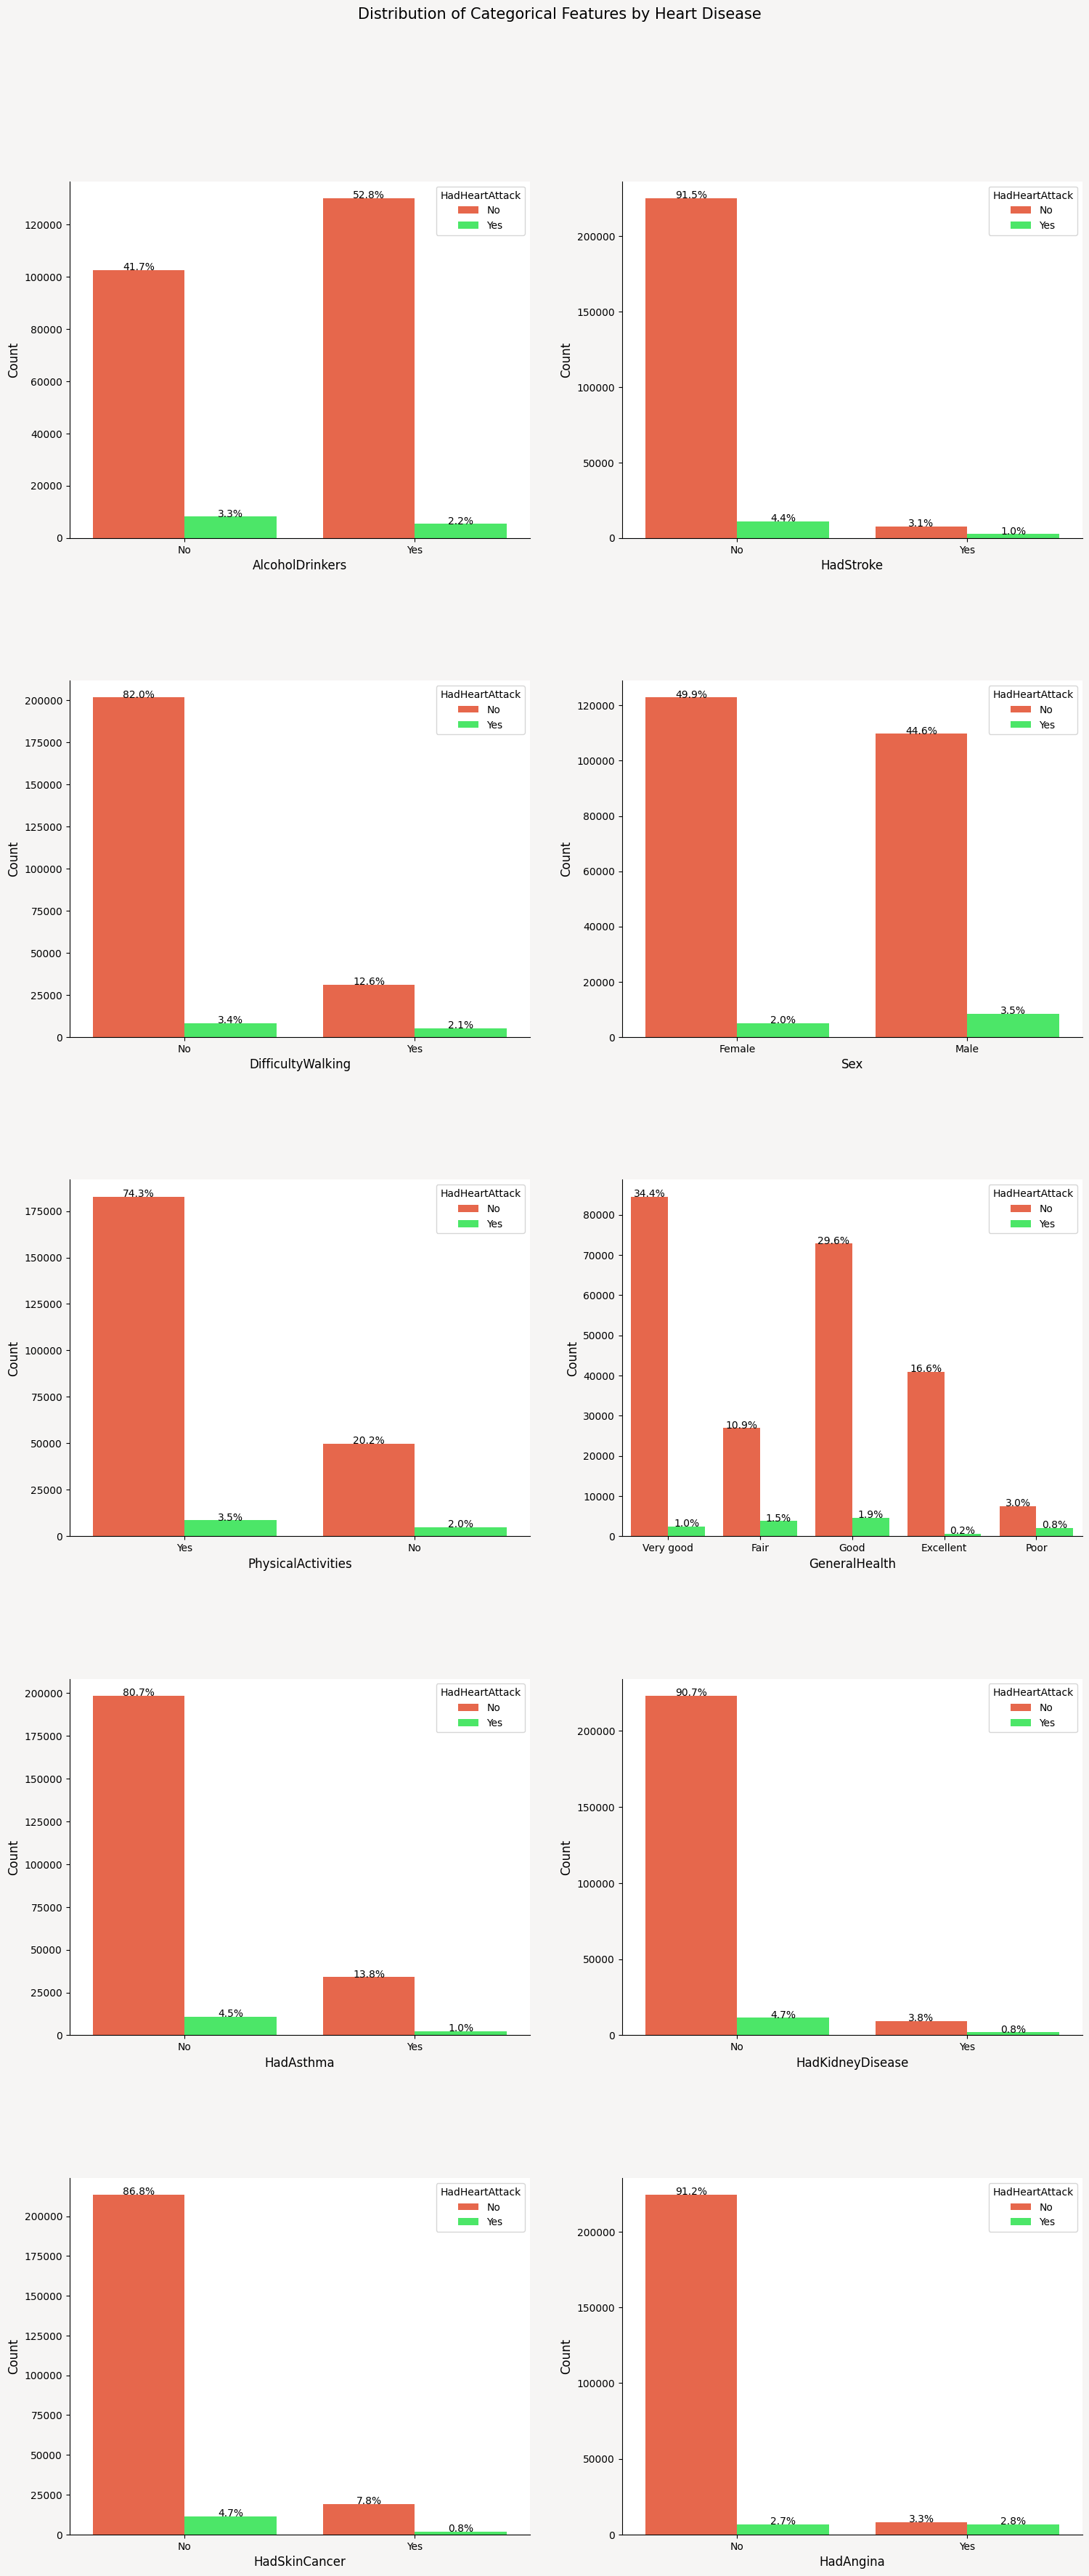

In [19]:
cat_feats = ['AlcoholDrinkers', 'HadStroke', 'DifficultyWalking', 'Sex', 'PhysicalActivities', 'GeneralHealth', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer', 'HadAngina']

L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)  

for i, col in enumerate(cat_feats):
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=df, x=col, hue="HadHeartAttack", palette=mypal, ax=ax)  
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Disease', fontsize=15)
plt.show()


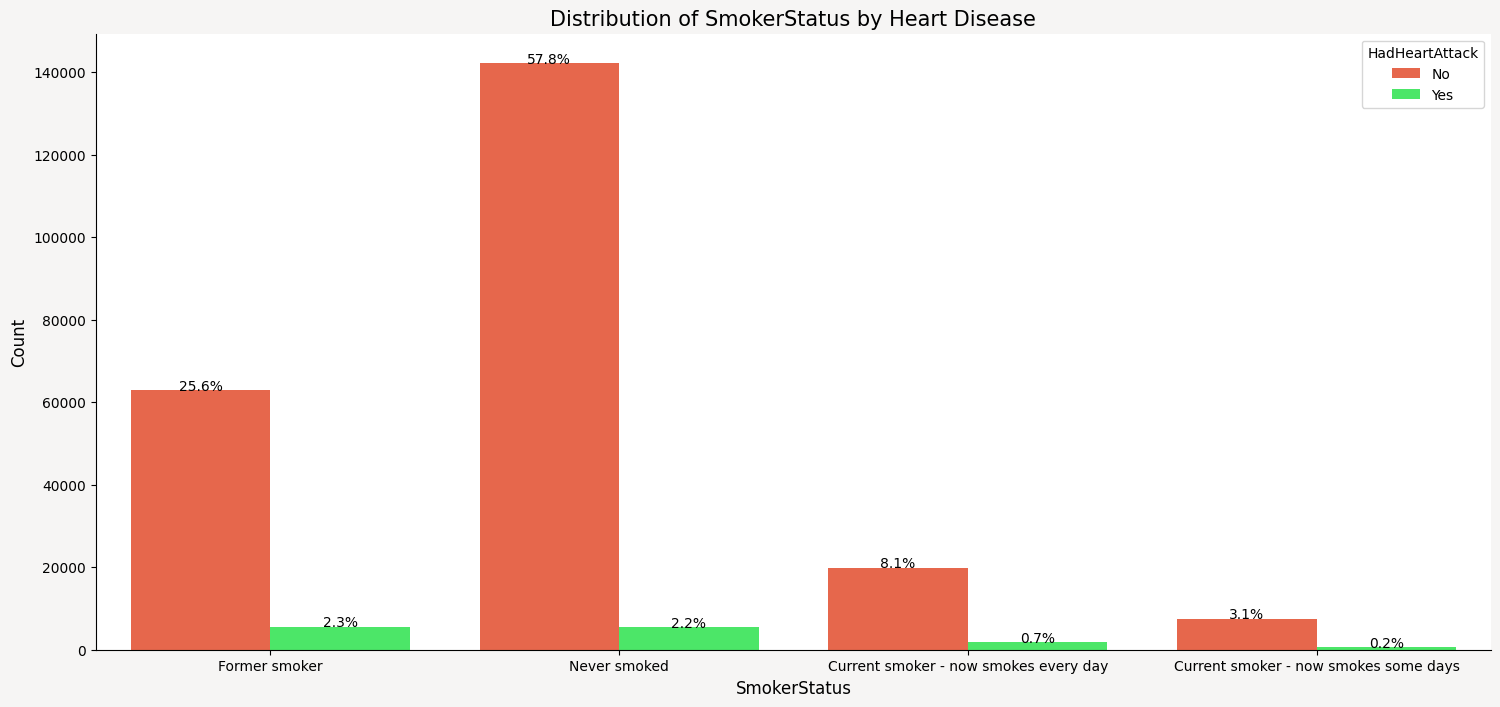

In [20]:
fig_smoker, ax_smoker = plt.subplots(figsize=(18, 8), facecolor='#F6F5F4')
sns.countplot(data=df, x="SmokerStatus", hue="HadHeartAttack", palette=mypal, ax=ax_smoker)
ax_smoker.set_xlabel("SmokerStatus", fontsize=12)
ax_smoker.set_ylabel("Count", fontsize=12)
sns.despine(right=True, ax=ax_smoker)
sns.despine(offset=0, trim=False, ax=ax_smoker)

total = float(len(df))
for p in ax_smoker.patches:
    height = p.get_height()
    ax_smoker.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

ax_smoker.set_title('Distribution of SmokerStatus by Heart Disease', fontsize=15)
plt.show()

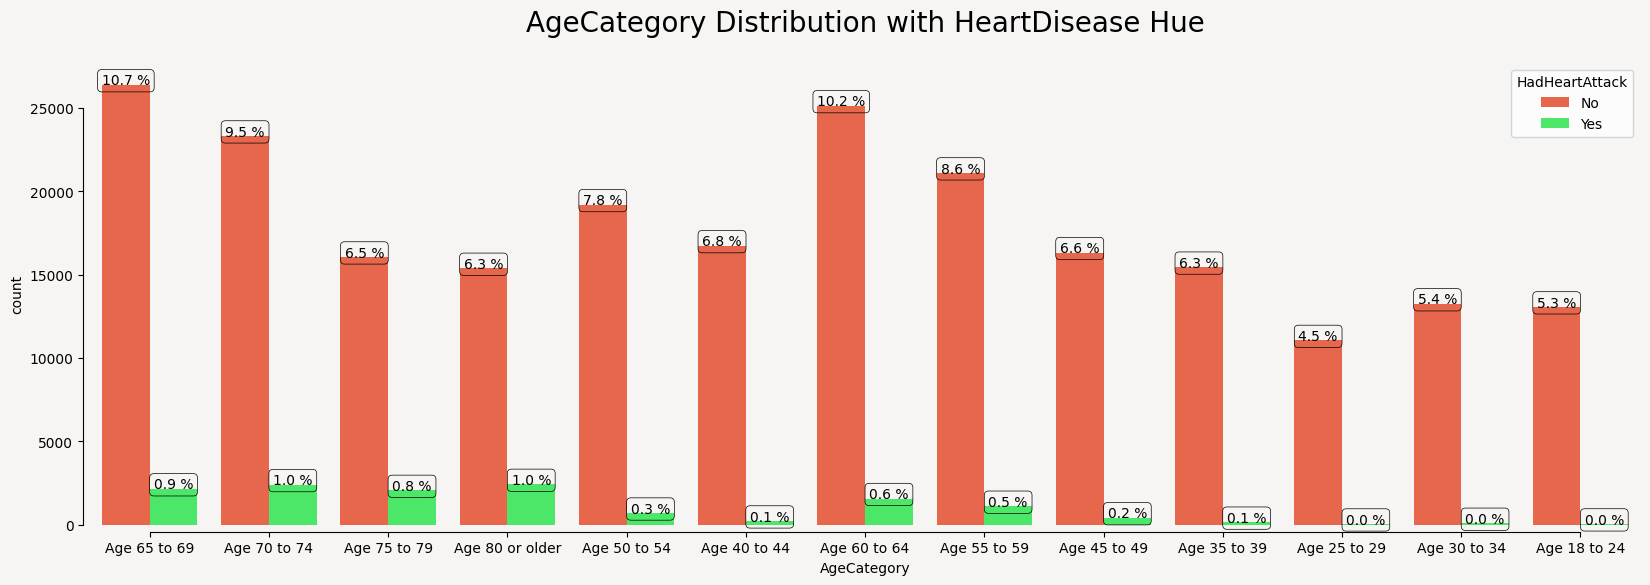

In [21]:
plt.figure(figsize=(20, 6), facecolor='#F6F5F4')
total = float(len(df))

ax = sns.countplot(x='AgeCategory', hue='HadHeartAttack', data=df, palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution with HeartDisease Hue', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()


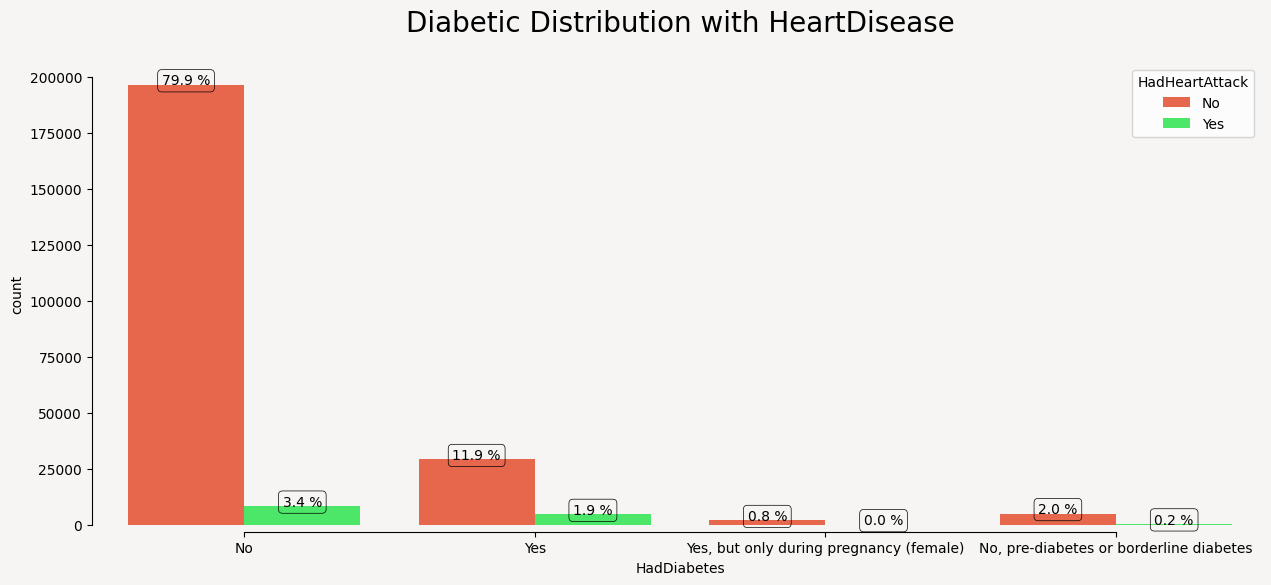

In [22]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(df))

ax = sns.countplot(x='HadDiabetes', hue='HadHeartAttack', data=df, palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution with HeartDisease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()


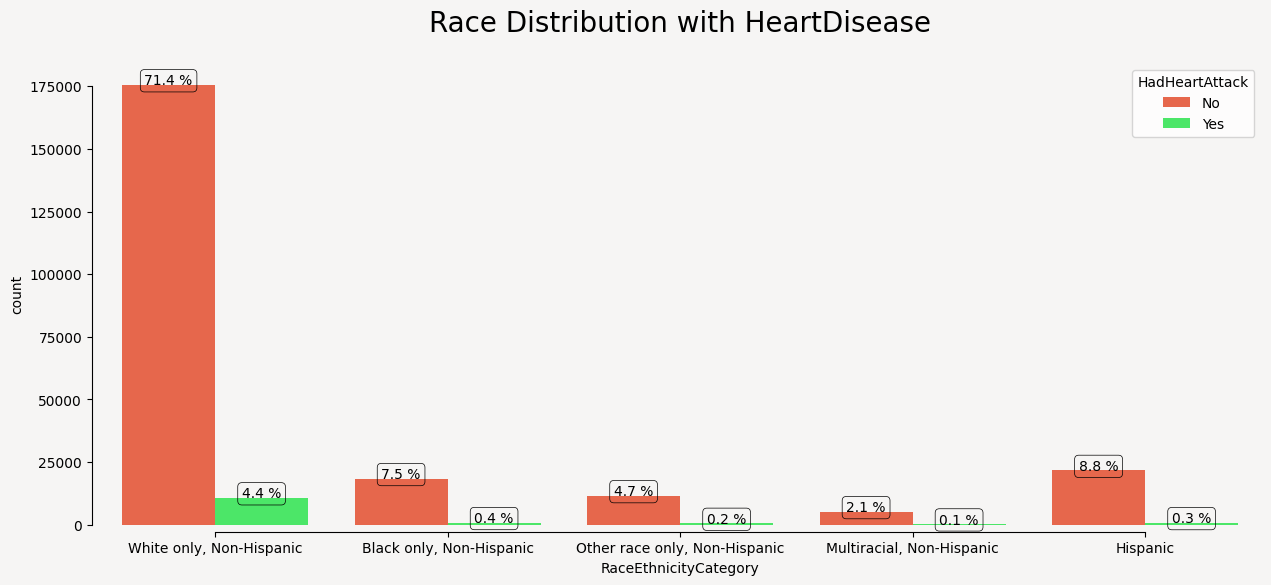

In [23]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(df))

ax = sns.countplot(x='RaceEthnicityCategory', hue='HadHeartAttack', data=df, palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution with HeartDisease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()


# Correlation Matrix:
#### Between numerical values


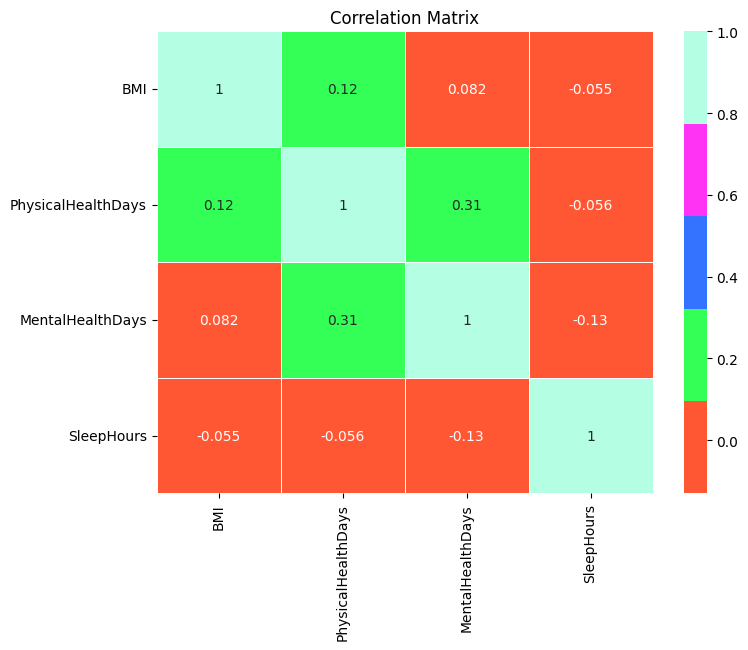

In [24]:
numeric_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours' ]
numeric_corr = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr, annot=True, cmap=sns.color_palette(mypal), linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering


In [25]:
df1 = df.copy()

# Encoding categorical variables

In [26]:
df1 = df1.replace({'No': 0, 'Yes': 1})

df1["Sex"] = df1["Sex"].replace({'Female': 0, 'Male': 1})

In [27]:
df1["HadDiabetes"].unique()

array([0, 1, 'Yes, but only during pregnancy (female)',
       'No, pre-diabetes or borderline diabetes'], dtype=object)

In [28]:
diabetic_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes': 1,
    'Yes, but only during pregnancy (female)': 1
}

df1['HadDiabetes'] = df1['HadDiabetes'].replace(diabetic_mapping).astype(int)



In [29]:
df1['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

In [30]:
race_mapping = {
    'Black only, Non-Hispanic': 0,
    'Hispanic': 1,
    'Other race only, Non-Hispanic': 2,
    'White only, Non-Hispanic': 3,
    'Multiracial, Non-Hispanic': 4
}

df1['RaceEthnicityCategory'] = df1['RaceEthnicityCategory'].map(race_mapping).astype(int)

In [31]:
df1['GeneralHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [32]:
gen_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

df1['GeneralHealth'] = df1['GeneralHealth'].replace(gen_health_mapping).astype(int)

In [33]:
df1['AgeCategory'].unique()

array(['Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older',
       'Age 50 to 54', 'Age 40 to 44', 'Age 60 to 64', 'Age 55 to 59',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

In [34]:
age_mapping = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}

df1['AgeCategory'] = df1['AgeCategory'].map(age_mapping).astype(int)

In [35]:
df1['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

In [36]:
state_mapping = {
    'Alabama':0,
    'Alaska':1,
    'Arizona':2,
    'Arkansas':3,
    'California':4,    
    'Colorado':5,
    'Connecticut':6,
    'Delaware':7,
    'District of Columbia':8,    
    'Florida':9,
    'Georgia':10,
    'Hawaii':11,
    'Idaho':12,
    'Illinois':13,
    'Indiana':14,
    'Iowa':15,
    'Kansas':16,
    'Kentucky':17,
    'Louisiana':18,
    'Maine':19,
    'Maryland':20,
    'Massachusetts':21,
    'Michigan':22,
    'Minnesota':23,
    'Mississippi':24,
    'Missouri':25,
    'Montana':26,
    'Nebraska':27,
    'Nevada':28,
    'New Hampshire':29,
    'New Jersey':30,
    'New Mexico':31,
    'New York':32,
    'North Carolina':33,
    'North Dakota':34,
    'Ohio':35,
    'Oklahoma':36,
    'Oregon':37,
    'Pennsylvania':38,
    'Rhode Island':39,
    'South Carolina':40,
    'South Dakota':41,
    'Tennessee':42,
    'Texas':43,
    'Utah':44,
    'Vermont':45,
    'Virginia':46,
    'Washington':47,
    'West Virginia':48,
    'Wisconsin':49,
    'Wyoming':50,
    'Guam':51,
    'Puerto Rico':52,
    'Virgin Islands':53
}



df1['State'] = df1['State'].map(state_mapping).astype(int)

In [37]:
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['LastCheckupTime', 'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage',
       'TetanusLast10Tdap', 'CovidPos'],
      dtype='object')

In [38]:
df1['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)',
       '5 or more years ago',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)'],
      dtype=object)

In [39]:
checkup_mapping = {
    'Within past year (anytime less than 12 months ago)':0,
    '5 or more years ago':1,
    'Within past 2 years (1 year but less than 2 years ago)':2,
    'Within past 5 years (2 years but less than 5 years ago)':3,
}

df1['LastCheckupTime'] = df1['LastCheckupTime'].map(checkup_mapping).astype(int)

In [40]:
df1['RemovedTeeth'].unique()

array(['None of them', '6 or more, but not all', '1 to 5', 'All'],
      dtype=object)

In [41]:
removedteeth_mapping = {
    'None of them':0,
    '6 or more, but not all':1,
    '1 to 5':2,
    'All':3,
}

df1['RemovedTeeth'] = df1['RemovedTeeth'].map(removedteeth_mapping).astype(int)

In [42]:
df1['SmokerStatus'].unique()

array(['Former smoker', 'Never smoked',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

In [43]:
smoker_mapping = {
    'Former smoker':0,
    'Never smoked':1,
    'Current smoker - now smokes every day':2,
    'Current smoker - now smokes some days':3,
}

df1['SmokerStatus'] = df1['SmokerStatus'].map(smoker_mapping).astype(int)

In [44]:
df1['ECigaretteUsage'].unique()

array(['Never used e-cigarettes in my entire life', 'Use them some days',
       'Not at all (right now)', 'Use them every day'], dtype=object)

In [45]:
ecigarettes_mapping = {
    'Never used e-cigarettes in my entire life':0,
    'Use them some days':1,
    'Not at all (right now)':2,
    'Use them every day':3,
}

df1['ECigaretteUsage'] = df1['ECigaretteUsage'].map(ecigarettes_mapping).astype(int)

In [46]:
df1['TetanusLast10Tdap'].unique()

array(['Yes, received Tdap',
       'Yes, received tetanus shot but not sure what type',
       'No, did not receive any tetanus shot in the past 10 years',
       'Yes, received tetanus shot, but not Tdap'], dtype=object)

In [47]:
titanus_mapping = {
    'Yes, received Tdap':0,
    'Yes, received tetanus shot but not sure what type':1,
    'No, did not receive any tetanus shot in the past 10 years':2,
    'Yes, received tetanus shot, but not Tdap':3,
}

df1['TetanusLast10Tdap'] = df1['TetanusLast10Tdap'].map(titanus_mapping).astype(int)

In [48]:
df3 = df.copy()

In [49]:
df3['CovidPos'].unique()

array(['No', 'Yes',
       'Tested positive using home test without a health professional'],
      dtype=object)

In [50]:
CovidPos_mapping = {
    'No':0,
    'Yes':1,
    'Tested positive using home test without a health professional':2,
}

df1['CovidPos'] = df3['CovidPos'].map(CovidPos_mapping).astype(int)

# Scaling Numerical Features

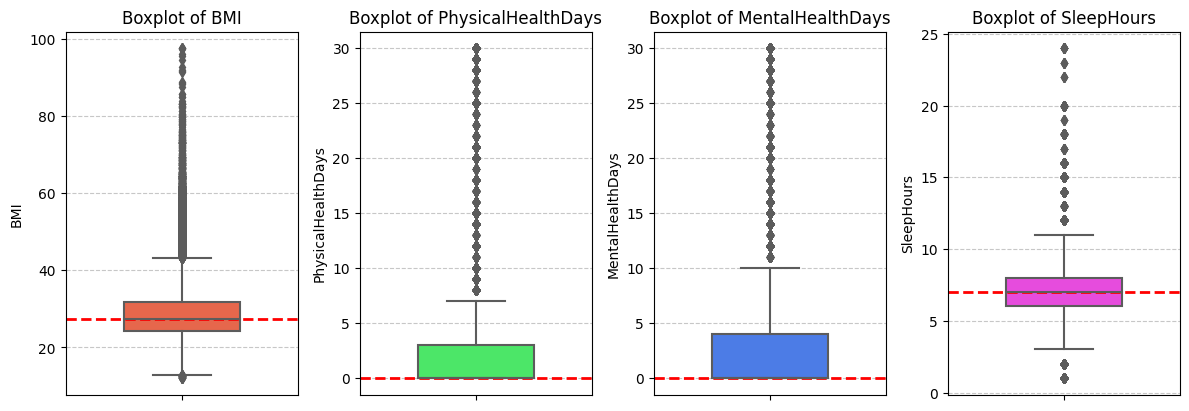

In [51]:
numerical_cols = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

palette = sns.color_palette(mypal)

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df1[column], color=palette[i-1], width=0.5)
    plt.axhline(y=df1[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


In [52]:
features_to_scale_robust = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']


robust_scaler = RobustScaler()

df1[features_to_scale_robust] = robust_scaler.fit_transform(df1[features_to_scale_robust])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in features_to_scale_robust:
    num_outliers = count_outliers(df1[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in BMI: 7563
Number of outliers in PhysicalHealthDays: 38809
Number of outliers in MentalHealthDays: 32714
Number of outliers in SleepHours: 3488


# Pearson Correlation:

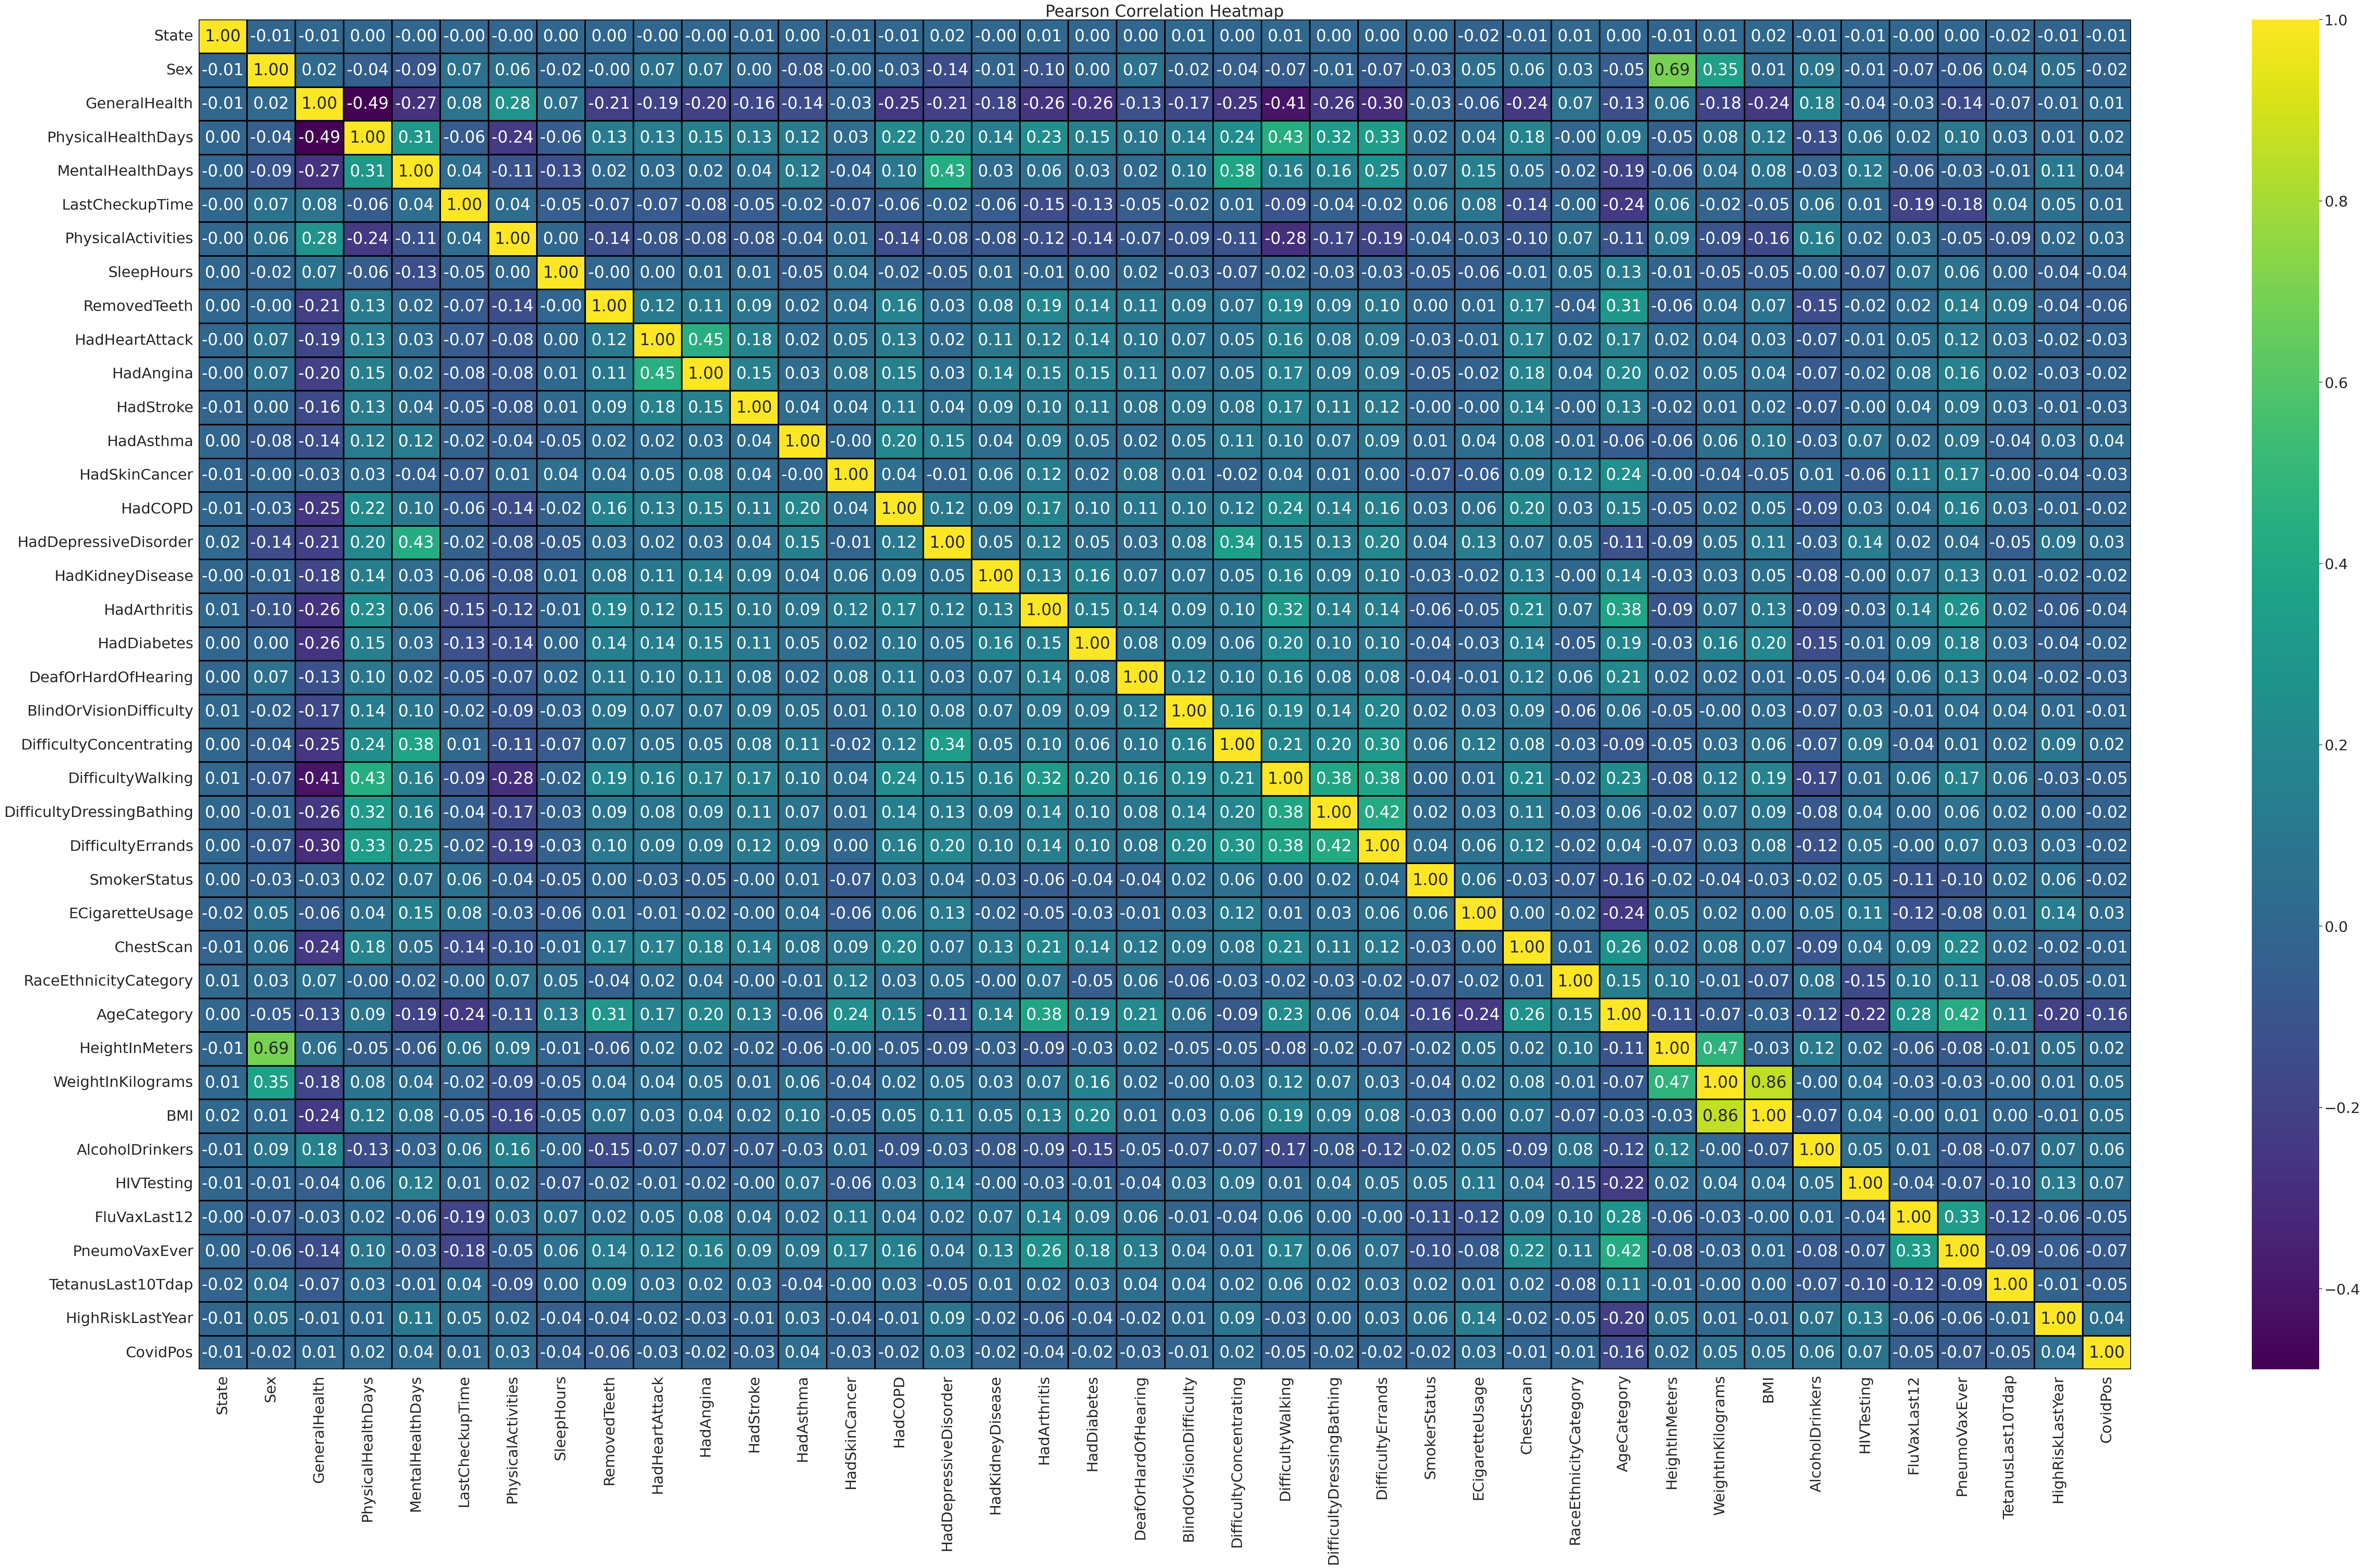

In [53]:
pearson_corr = df1.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(16*5, 9*5))
sns.set(font_scale=2.5)
sns.heatmap(pearson_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=1.5, linecolor='black')
plt.title('Pearson Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [54]:
filtered_corr = pearson_corr[pearson_corr > 0.3]

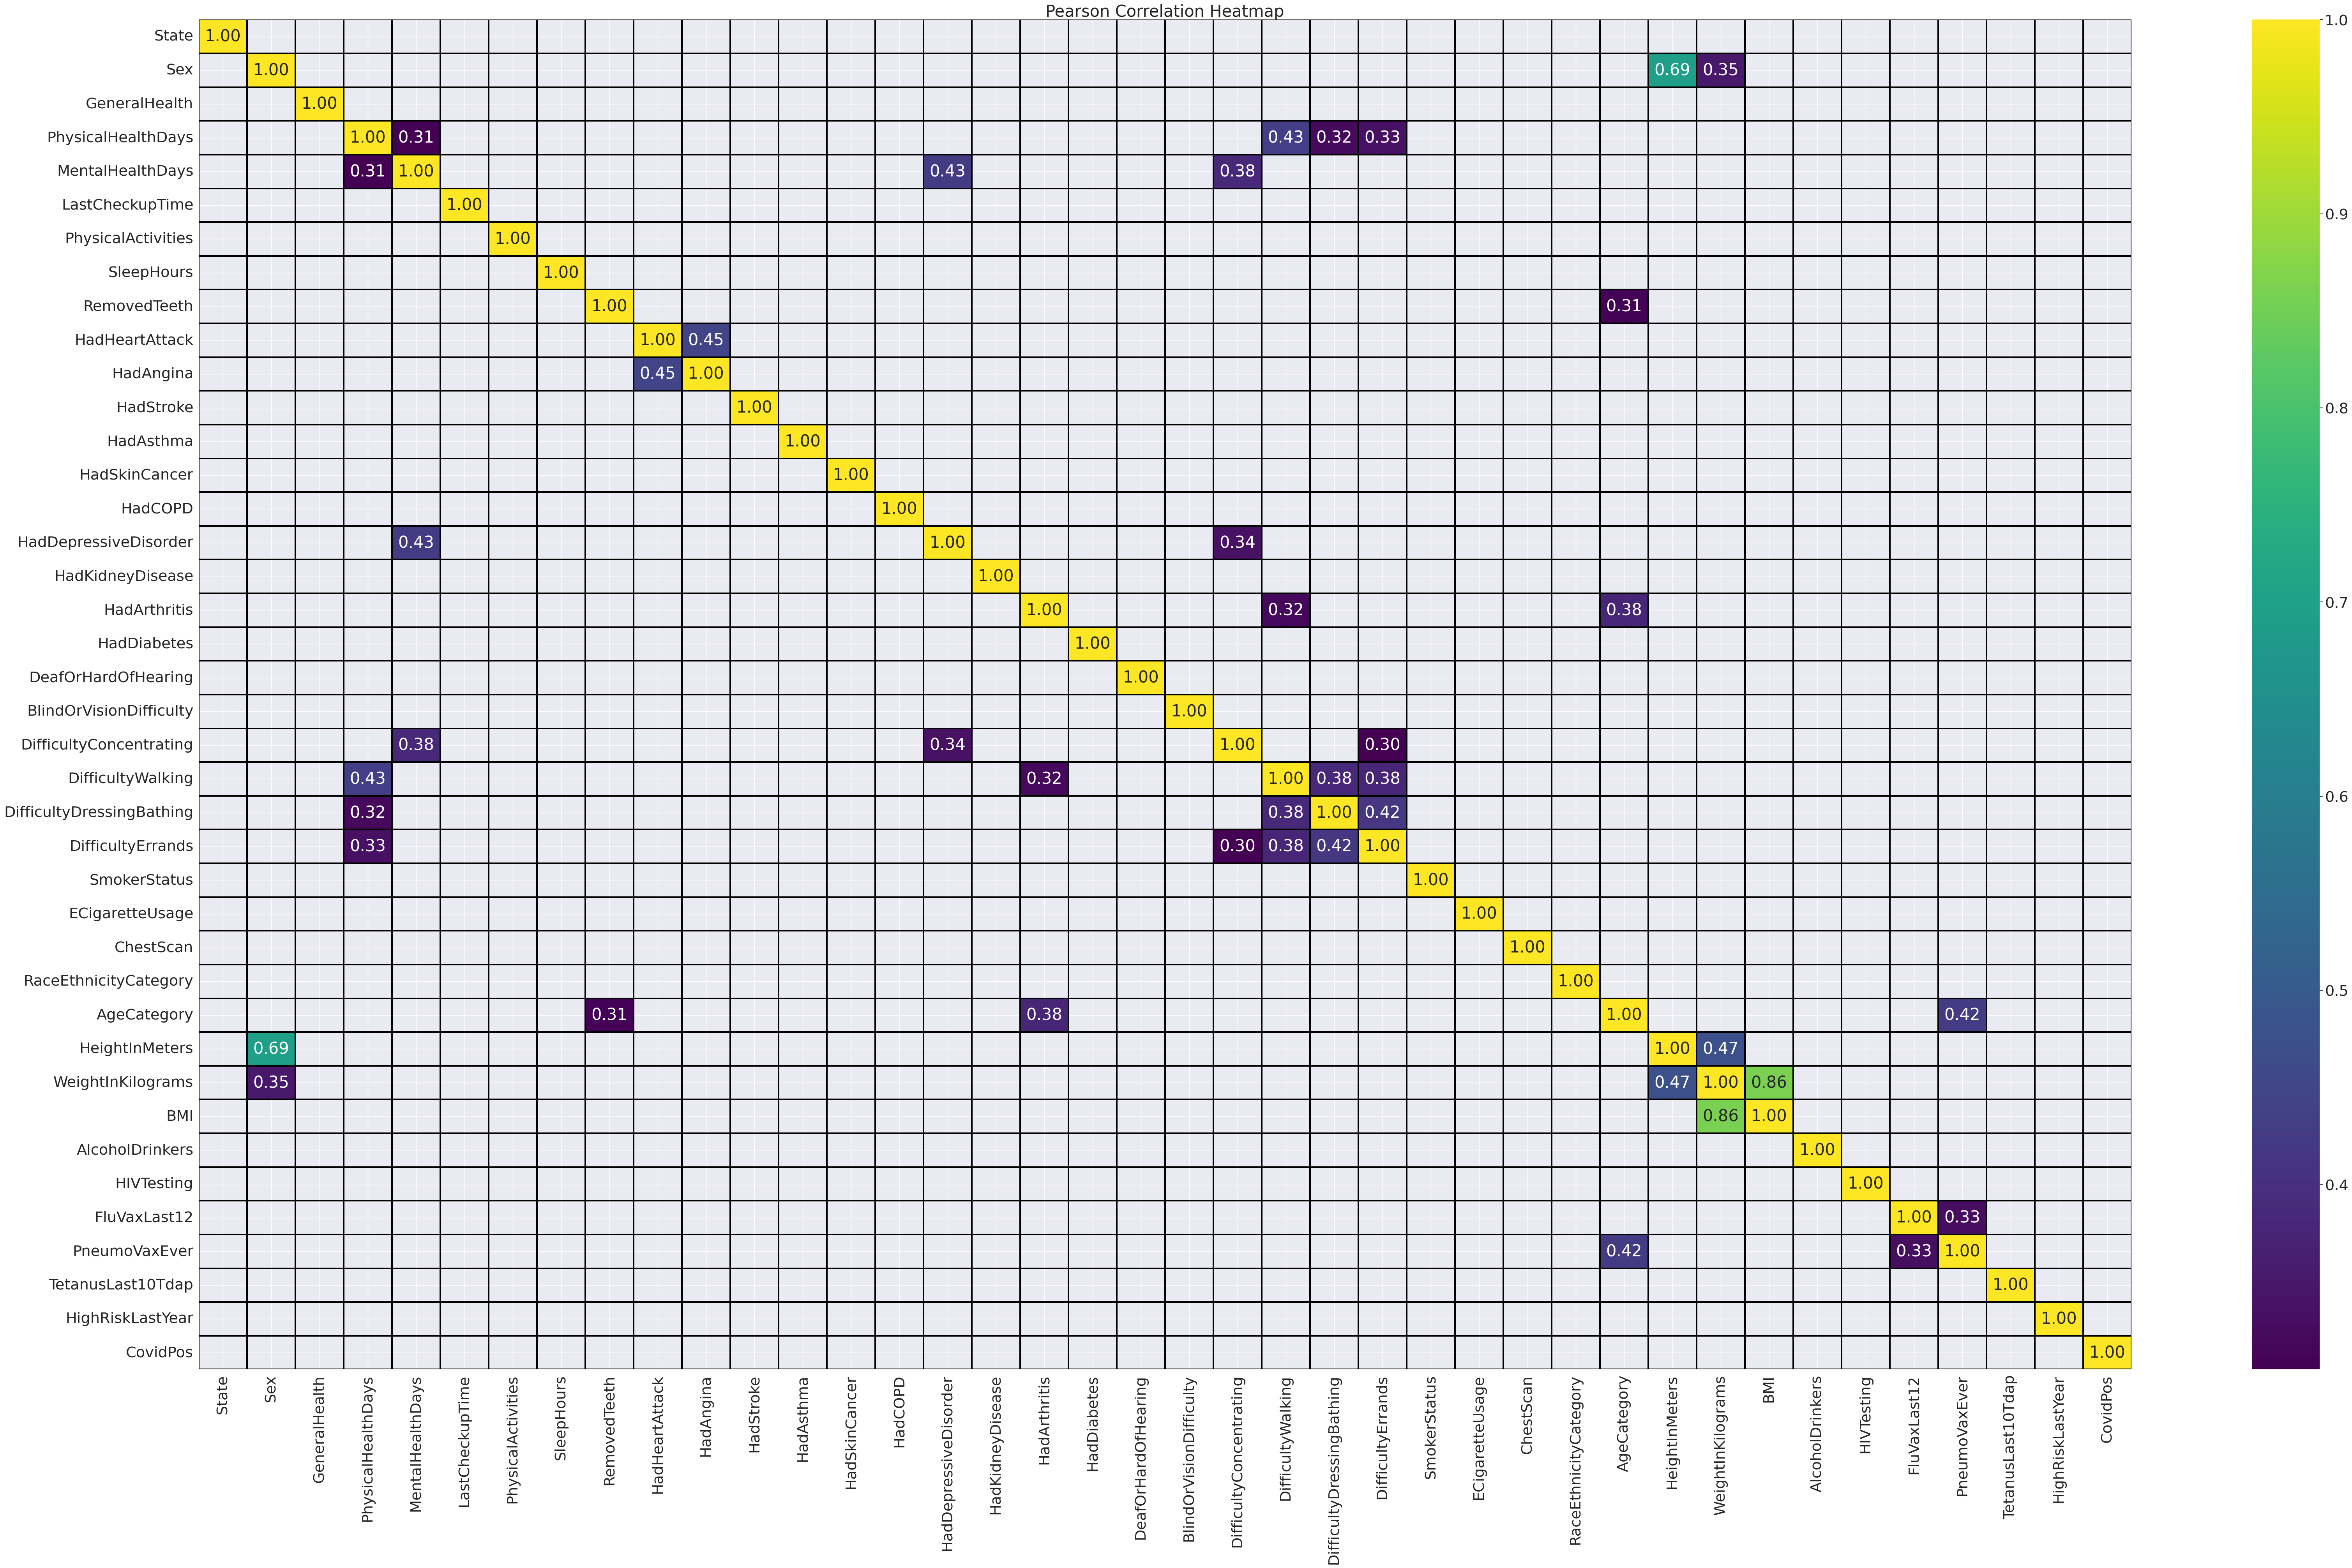

In [55]:
# Plot heatmap
plt.figure(figsize=(16*5, 9*5))
sns.set(font_scale=2.5)
sns.heatmap(filtered_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=1.5, linecolor='black')
plt.title('Pearson Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [56]:
def perform_chi_square(df, target_var, categorical_vars):
    results = {}
    for var in categorical_vars:
        contingency_table = pd.crosstab(df[target_var], df[var])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results[var] = {
            'chi2_statistic': chi2,
            'p_value': p,
            'degrees_of_freedom': dof,
            'expected_frequencies': expected
        }
    return results


In [57]:
from scipy.stats import chi2_contingency
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
chi_square_results = perform_chi_square(df, 'HadHeartAttack', categorical_columns)

for var, result in chi_square_results.items():
    print(f"Chi-Square Test for {var}:")
    print(f"Chi-Square Statistic: {result['chi2_statistic']}")
    print(f"P-Value: {result['p_value']}")
    print(f"Degrees of Freedom: {result['degrees_of_freedom']}")
    print(f"Expected Frequencies: \n{result['expected_frequencies']}\n")


Chi-Square Test for State:
Chi-Square Statistic: 491.61012275155537
P-Value: 2.2886539685335443e-72
Degrees of Freedom: 53
Expected Frequencies: 
[[ 1798.13000126  3029.9719527   5162.7696829   2779.44385053
   4817.70267425  4877.26218533  4777.05094446  2037.31343466
   1630.79613679  6915.52100905  4706.1467646   1464.40766138
   5290.39720665  3278.60927675  2464.62929195  5201.53063456
   5362.24677558  5809.41580323  2281.22381338  2845.62108506
   5684.62444668  8662.60000081  5166.55123916  5076.73927801
   8660.70922268  2304.85854     3965.90712686  4031.13897233
   4828.10195396  1672.39325564  3550.88132741  3749.41303102
   2805.91474434  8435.70662526  2411.68750432  2361.58188388
   8503.77463793  2780.38923959  2882.49125859  2579.96675785
   3393.00135359  2941.10538061  5172.22357355  4163.4934414
   2576.1852016   7003.44219208  5079.5754452   4579.46462992
    702.42407515  5261.09014564 14178.94519395  2811.58707873
   5791.453411    2278.38764618]
 [  103.86999874

In [58]:
pearson_corr["HadHeartAttack"].sort_values(ascending=False)

HadHeartAttack               1.000000
HadAngina                    0.445902
HadStroke                    0.177149
AgeCategory                  0.172181
ChestScan                    0.167766
DifficultyWalking            0.159884
HadDiabetes                  0.139790
PhysicalHealthDays           0.133422
HadCOPD                      0.133220
PneumoVaxEver                0.119965
RemovedTeeth                 0.118735
HadArthritis                 0.117772
HadKidneyDisease             0.109353
DeafOrHardOfHearing          0.097660
DifficultyErrands            0.089492
DifficultyDressingBathing    0.083089
Sex                          0.073317
BlindOrVisionDifficulty      0.072962
DifficultyConcentrating      0.051661
HadSkinCancer                0.049415
FluVaxLast12                 0.045242
WeightInKilograms            0.038432
TetanusLast10Tdap            0.030774
BMI                          0.030409
MentalHealthDays             0.025888
RaceEthnicityCategory        0.024955
HadAsthma   

# Z Test for Independence:

In [59]:
from statsmodels.stats.weightstats import ztest

# BMI Vs Heart Attack
#### Null Hypothesis (H0): There is no significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.

#### Alternative Hypothesis (H1): There is a significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.

In [60]:
bmi_heart_attack = df[df['HadHeartAttack'] == 'Yes']['BMI']
bmi_no_heart_attack = df[df['HadHeartAttack'] == 'No']['BMI']
# Perform a two-sample z-test
# By default, ztest assumes unequal variance, which is appropriate for most practical cases
z_stat, p_value = ztest(bmi_heart_attack, bmi_no_heart_attack)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.")

Z-statistic: 15.08988743514371
P-value: 1.887640666854686e-51
Reject the null hypothesis: There is a significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.


# Physical Health Days Vs Heart Attack

#### Null Hypothesis (H0): There is no significant difference in the mean Physical Health Days between individuals who have had a heart attack and those who haven't.

#### Alternative Hypothesis (H1): There is a significant difference in the mean Physical Health Days between individuals who have had a heart attack and those who haven't.

In [61]:
physical_health_days_heart_attack = df[df['HadHeartAttack'] == 'Yes']['PhysicalHealthDays']
physical_health_days_no_heart_attack = df[df['HadHeartAttack'] == 'No']['PhysicalHealthDays']
# Perform a two-sample z-test
# By default, ztest assumes unequal variance, which is appropriate for most practical cases
z_stat, p_value = ztest(physical_health_days_heart_attack, physical_health_days_no_heart_attack)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean of Physical health days between individuals who have had a heart attack and those who haven't.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean of Physical health days between individuals who have had a heart attack and those who haven't.")

Z-statistic: 66.77360247352787
P-value: 0.0
Reject the null hypothesis: There is a significant difference in the mean of Physical health days between individuals who have had a heart attack and those who haven't.


# Sleep Hours Vs Heart Attack

#### Null Hypothesis (H0): There is no significant difference in the mean of Sleeping Hours between individuals who have had a heart attack and those who haven't.

#### Alternative Hypothesis (H1): There is a significant difference in the mean of Sleeping Hours between individuals who have had a heart attack and those who haven't.

In [62]:
SleepHours_heart_attack = df[df['HadHeartAttack'] == 'Yes']['SleepHours']
SleepHours_no_heart_attack = df[df['HadHeartAttack'] == 'No']['SleepHours']
# Perform a two-sample z-test
# By default, ztest assumes unequal variance, which is appropriate for most practical cases
z_stat, p_value = ztest(SleepHours_heart_attack, SleepHours_no_heart_attack)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean of Sleep Hours between individuals who have had a heart attack and those who haven't.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean of Sleep Hours between individuals who have had a heart attack and those who haven't.")

Z-statistic: 1.8025623243130904
P-value: 0.07145697843990968
Fail to reject the null hypothesis: There is no significant difference in the mean of Sleep Hours between individuals who have had a heart attack and those who haven't.


# Mental Health Days Vs Heart Attack

#### Null Hypothesis (H0): There is no significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.

#### Alternative Hypothesis (H1): There is a significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.

In [63]:
MentalHealthDays_heart_attack = df[df['HadHeartAttack'] == 'Yes']['MentalHealthDays']
MentalHealthDays_no_heart_attack = df[df['HadHeartAttack'] == 'No']['SleepHours']
# Perform a two-sample z-test
# By default, ztest assumes unequal variance, which is appropriate for most practical cases
z_stat, p_value = ztest(MentalHealthDays_heart_attack, MentalHealthDays_no_heart_attack)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.")

Z-statistic: -85.60980663008152
P-value: 0.0
Reject the null hypothesis: There is a significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.
